# Feature Engineering

### Packages and Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

from textblob import TextBlob
from textblob import Word

stop = stopwords.words('english')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

[nltk_data] Downloading package stopwords to /home/tom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load Data

In [2]:
main = pd.read_csv('main.csv').drop('Unnamed: 0', 1)

/home/tom/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (352,353,360,361,363,365,366,367,368,369,370,371,376,377) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Inspect

In [3]:
main.head(1)

,level_0,ep_id,full_name,date_of_birth,hometown,country,youth_team,position,height,weight,shoots,status,scout_text,regular_gp_17,regular_gp_18,regular_gp_19,regular_gp_20,regular_gp_21,regular_gp_22,regular_gp_23,regular_gp_24,regular_gp_25,regular_gp_26,regular_gp_27,regular_gp_28,regular_g_17,regular_g_18,regular_g_19,regular_g_20,regular_g_21,regular_g_22,regular_g_23,regular_g_24,regular_g_25,regular_g_26,regular_g_27,regular_g_28,regular_a_17,regular_a_18,regular_a_19,regular_a_20,regular_a_21,regular_a_22,regular_a_23,regular_a_24,regular_a_25,regular_a_26,regular_a_27,regular_a_28,regular_pim_17,regular_pim_18,regular_pim_19,regular_pim_20,regular_pim_21,regular_pim_22,regular_pim_23,regular_pim_24,regular_pim_25,regular_pim_26,regular_pim_27,regular_pim_28,regular_pm_17,regular_pm_18,regular_pm_19,regular_pm_20,regular_pm_21,regular_pm_22,regular_pm_23,regular_pm_24,regular_pm_25,regular_pm_26,regular_pm_27,regular_pm_28,playoffs_gp_17,playoffs_gp_18,playoffs_gp_19,playoffs_gp_20,playoffs_gp_21,playoffs_gp_22,playoffs_gp_23,playoffs_gp_24,playoffs_gp_25,playoffs_gp_26,playoffs_gp_27,playoffs_gp_28,playoffs_g_17,playoffs_g_18,playoffs_g_19,playoffs_g_20,playoffs_g_21,playoffs_g_22,playoffs_g_23,playoffs_g_24,playoffs_g_25,playoffs_g_26,playoffs_g_27,playoffs_g_28,playoffs_a_17,playoffs_a_18,playoffs_a_19,playoffs_a_20,playoffs_a_21,playoffs_a_22,playoffs_a_23,playoffs_a_24,playoffs_a_25,playoffs_a_26,playoffs_a_27,playoffs_a_28,playoffs_pim_17,playoffs_pim_18,playoffs_pim_19,playoffs_pim_20,playoffs_pim_21,playoffs_pim_22,playoffs_pim_23,playoffs_pim_24,playoffs_pim_25,playoffs_pim_26,playoffs_pim_27,playoffs_pim_28,playoffs_pm_17,playoffs_pm_18,playoffs_pm_19,playoffs_pm_20,playoffs_pm_21,playoffs_pm_22,playoffs_pm_23,playoffs_pm_24,playoffs_pm_25,playoffs_pm_26,playoffs_pm_27,playoffs_pm_28,award_count_17,award_count_18,award_count_19,award_count_20,award_count_21,award_count_22,award_count_23,award_count_24,award_count_25,award_count_26,award_count_27,award_count_28,regular_gp_16,regular_gp_29,regular_gp_30,regular_gp_31,regular_gp_32,regular_gp_33,regular_gp_34,regular_gp_35,regular_g_16,regular_g_29,regular_g_30,regular_g_31,regular_g_32,regular_g_33,regular_g_34,regular_g_35,regular_a_16,regular_a_29,regular_a_30,regular_a_31,regular_a_32,regular_a_33,regular_a_34,regular_a_35,regular_pim_16,regular_pim_29,regular_pim_30,regular_pim_31,regular_pim_32,regular_pim_33,regular_pim_34,regular_pim_35,regular_pm_16,regular_pm_29,regular_pm_30,regular_pm_31,regular_pm_32,regular_pm_33,regular_pm_34,regular_pm_35,playoffs_gp_16,playoffs_gp_29,playoffs_gp_30,playoffs_gp_31,playoffs_gp_32,playoffs_gp_33,playoffs_gp_34,playoffs_gp_35,playoffs_g_16,playoffs_g_29,playoffs_g_30,playoffs_g_31,playoffs_g_32,playoffs_g_33,playoffs_g_34,playoffs_g_35,playoffs_a_16,playoffs_a_29,playoffs_a_30,playoffs_a_31,playoffs_a_32,playoffs_a_33,playoffs_a_34,playoffs_a_35,playoffs_pim_16,playoffs_pim_29,playoffs_pim_30,playoffs_pim_31,playoffs_pim_32,playoffs_pim_33,playoffs_pim_34,playoffs_pim_35,playoffs_pm_16,playoffs_pm_29,playoffs_pm_30,playoffs_pm_31,playoffs_pm_32,playoffs_pm_33,playoffs_pm_34,playoffs_pm_35,award_count_16,award_count_29,award_count_30,award_count_31,award_count_32,award_count_33,award_count_34,award_count_35,regular_gp_15,regular_gp_36,regular_g_15,regular_g_36,regular_a_15,regular_a_36,regular_pim_15,regular_pim_36,regular_pm_15,regular_pm_36,playoffs_gp_15,playoffs_gp_36,playoffs_g_15,playoffs_g_36,playoffs_a_15,playoffs_a_36,playoffs_pim_15,playoffs_pim_36,playoffs_pm_15,playoffs_pm_36,award_count_15,award_count_36,regular_gp_37,regular_gp_38,regular_gp_39,regular_g_37,regular_g_38,regular_g_39,regular_a_37,regular_a_38,regular_a_39,regular_pim_37,regular_pim_38,regular_pim_39,regular_pm_37,regular_pm_38,regular_pm_39,playoffs_gp_37,playoffs_gp_38,playoffs_gp_39,playoffs_g_37,playoffs_g_38,playoffs_g_39,playoffs_a_37,playoffs_a_38,playoffs_a_39,playoffs_pim_37,playoffs_pim_38,playoffs_pim_39,playoffs_pm_37,playoffs_p

### Refactor league_25 as the response

In [4]:
replacements = {
    np.nan: 'Not Active',
    0: 'Not Active',
    'ECHL': 'Lower',
    'AHL': 'Lower',
    'USports': 'Lower',
    'NCHL': 'Lower',
    'LHSAM': 'Lower',
    'LHCS': 'Lower',
    'LNAH': 'Lower',
    'CHL': 'Lower',
    'NCHL-MB': 'Lower',
    'NLSHL': 'Lower',
    'SPHL': 'Lower',
    'LHSR': 'Lower',
    'LHSCE': 'Lower',
    'SEMHL': 'Lower',
    'NESHL': 'Lower',
    'WOAA': 'Lower',
    'HHL': 'Lower',
    'CRL': 'Lower',
    'FPHL': 'Lower',
    'Chinook HL': 'Lower',
    'FHL': 'Lower',
    'LHSAAAQ': 'Lower',
    'BSHL': 'Lower',
    'NPHL-Sr.': 'Lower',
    'WMHL': 'Lower',
    'ACHW': 'Lower',
    'GLHL': 'Lower',
    'RHL': 'Lower',
    'ACAC': 'Lower',
    'SVHL': 'Lower',
    'SWHL': 'Lower',
    'BCIHL': 'Lower',
    'QVHL': 'Lower',
    'WCSHL': 'Lower',
    'LHBBF': 'Lower',
    'OHL': 'Lower',
    'BRHL': 'Lower',
    'FCHL': 'Lower',
    'THHL': 'Lower',
    'ACHA II': 'Lower',
    'LHSLF': 'Lower',
    'CIHL': 'Lower',
    'LRH': 'Lower',
    'NSHL-Sr.': 'Lower',
    'LHSEQ': 'Lower',
    'ACH': 'Lower',
    'IHL': 'Lower',
    'MSHL': 'Lower',
    'SASHL': 'Lower',
    'CSHL-Sr.': 'Lower',
    'USHL': 'Lower',
    'OWSHL': 'Lower',
    'LLHL': 'Lower',
    'CWSHL': 'Lower',
    'LHSBEQ': 'Lower',
    'QSCHL': 'Lower',
    'LHSAO': 'Lower',
    'ASHL': 'Lower',
    'NCAA III': 'Lower',
    'THL': 'Lower',
    'AAHL': 'Lower',
    'Notekeu HL': 'Lower',
    'QMJHL': 'Lower',
    'ACHA III': 'Lower',
    'LHSCN': 'Lower',
    'EPHL': 'Lower',
    'SHL': 'Lower',
    'NLA': 'Lower', 
    'Russia': 'Lower', 
    'Germany3': 'Lower',
    'Germany2': 'Lower',
    'NLB': 'Lower',
    'EIHL': 'Lower',
    'KHL': 'Lower',
    'France': 'Lower',
    'Italy': 'Lower',
    'DEL': 'Lower',
    'EBEL': 'Lower',
    'Netherlands': 'Lower', 
    'Czech': 'Lower',
    'Slovakia': 'Lower',
    'Liiga': 'Lower', 
    'Allsvenskan': 'Lower',
    'Czech2': 'Lower',
    'Norway': 'Lower', 
    'Germany5': 'Lower', 
    'Denmark': 'Lower',
    'Belarus': 'Lower',
    'DEL2': 'Lower',
    'VHL': 'Lower',
    'Slovakia2': 'Lower',
    'Division 1': 'Lower', 
    'NZIHL': 'Lower', 
    'AlpsHL': 'Lower', 
    'Czech3': 'Lower',
    'NIHL 1': 'Lower',
    'Asia League': 'Lower',
    'Kazakhstan': 'Lower',
    'France2': 'Lower',
    'Serbia': 'Lower',
    'Czech4': 'Lower',
    'Division 2': 'Lower',
    'NCAA': 'Lower',
    'AIHL': 'Lower',
    'EPIHL': 'Lower',
    'France3': 'Lower',
    'Poland': 'Lower',
    'International': 'Lower',
    'Italy2': 'Lower', 
    'UHL': 'Lower',
    'Russia2': 'Lower',
    'MLH': 'Lower',
    'Russia3': 'Lower', 
    'Erste Liga': 'Lower', 
    'SwissDiv1': 'Lower',
    'Suomi-sarja': 'Lower',
    'Mestis': 'Lower',
    'Germany4': 'Lower', 
    'EOSHL-Sr': 'Lower', 
    'ULLH': 'Lower',
    'CIHL HK': 'Lower', 
    'ECSHL': 'Lower',
    'Spain': 'Lower',
    'Latvia': 'Lower'
}

main['response'] = main['league_25'].replace(replacements)

In [5]:
main['response'].unique()

array(['Lower', 'NHL', 'Not Active'], dtype=object)

### Refactor country as birth_region

In [6]:
main['country'] = main['country'].str.extract(r'(\w+)\s')

In [7]:
main['country'].unique()

array([nan, 'Canada', 'USA', 'Czech', 'Hungary', 'Germany', 'South',
       'Switzerland', 'Austria', 'Kazakhstan', 'England', 'Russia',
       'Netherlands', 'Serbia', 'Turkey', 'Denmark', 'Sweden', 'Italy',
       'France', 'Croatia', 'Belarus', 'Poland', 'Norway', 'Finland',
       'Latvia', 'Belgium', 'Portugal', 'Slovakia'], dtype=object)

In [8]:
regions = {
    'Czech': 'Eastern Europe',
    'Sweden': 'Scandanavia',
    'Germany': 'Western Europe',
    'Slovakia': 'Eastern Europe',
    'Finland': 'Scandanavia',
    'Italy': 'Western Europe',
    'Norway': 'Scandanavia',
    'Switzerland': 'Western Europe',
    'Latvia': 'Eastern Europe',
    'Ukraine': 'Eastern Europe',
    'Denmark': 'Scandanavia',
    'Hungary': 'Eastern Europe',
    'Belarus': 'Eastern Europe',
    'Kazakhstan': 'Eastern Europe',
    'Slovenia': 'Eastern Europe',
    'U': 'Western Europe', # U is United Kingdom (UK)
    'Austria': 'Western Europe',
    'France': 'Western Europe',
    'South': 'Asia',
    'Croatia': 'Eastern Europe',
    'Israel': 'Eastern Europe',
    'Poland': 'Eastern Europe',
    'England': 'Western Europe',
    'Japan': 'Asia',
    'Netherlands': 'Western Europe',
    np.nan: 'Canada',
    'Serbia': 'Eastern Europe',
    'Turkey': 'Eastern Europe',
    'Belgium': 'Western Europe',
    'Portugal': 'Western Europe'
}

main['birth_region'] = main['country'].replace(regions)

In [9]:
main['birth_region'].unique()

array(['Canada', 'USA', 'Eastern Europe', 'Western Europe', 'Asia',
       'Russia', 'Scandanavia'], dtype=object)

### Manage position

In [10]:
main['position'].unique()

array(['C', 'RW', 'C/LW', 'LW/C', 'LW', 'C/RW', 'F', 'LW/RW', 'D', 'W/C',
       'C/W', 'RW/LW', 'C/D', 'D/C', 'RW/C', 'RW/D', 'D/W', 'D/LW',
       'D/RW', 'D/F', 'LW/D', 'C/RW/D', 'F/D', 'F/RW', 'W/D', 'LW/C/D',
       'W'], dtype=object)

In [11]:
positions = {
    'RW/C': 'Forward',
    'C/LW': 'Forward',
    'RW/LW': 'Winger',
    'D/F': 'Mixed',
    'F': 'Forward',
    'LW/D': 'Mixed',
    'C/RW': 'Forward',
    'LW/RW': 'Forward',
    'LW/C': 'Forward',
    'LW/C/D': 'Mixed',
    'D/W': 'Mixed',
    'W/C/D': 'Mixed',
    'W/C': 'Forward',
    'C/W': 'Forward',
    'D/RW': 'Mixed',
    'F/D': 'Mixed',
    'D/LW': 'Mixed',
    'RW/D': 'Mixed',
    'D/C': 'Mixed',
    'C/RW/D': 'Mixed',
    'W/D': 'Mixed',
    'W': 'Forward',
    'C/D': 'Mixed',
    'F/RW': 'Forward'
}

main['position'] = main['position'].replace(positions)

In [12]:
main['position'].unique()

array(['C', 'RW', 'Forward', 'LW', 'D', 'Winger', 'Mixed'], dtype=object)

### Subset and reorder

In [13]:
columns = sorted([i for i in main.columns.unique()])
columns

['award_count_12',
 'award_count_13',
 'award_count_14',
 'award_count_15',
 'award_count_16',
 'award_count_17',
 'award_count_18',
 'award_count_19',
 'award_count_20',
 'award_count_21',
 'award_count_22',
 'award_count_23',
 'award_count_24',
 'award_count_25',
 'award_count_26',
 'award_count_27',
 'award_count_28',
 'award_count_29',
 'award_count_30',
 'award_count_31',
 'award_count_32',
 'award_count_33',
 'award_count_34',
 'award_count_35',
 'award_count_36',
 'award_count_37',
 'award_count_38',
 'award_count_39',
 'birth_region',
 'country',
 'date_of_birth',
 'ep_id',
 'full_name',
 'height',
 'hometown',
 'inter_award_count_14',
 'inter_award_count_15',
 'inter_award_count_16',
 'inter_award_count_17',
 'inter_award_count_18',
 'inter_regular_a_14',
 'inter_regular_a_15',
 'inter_regular_a_16',
 'inter_regular_a_17',
 'inter_regular_a_18',
 'inter_regular_g_14',
 'inter_regular_g_15',
 'inter_regular_g_16',
 'inter_regular_g_17',
 'inter_regular_g_18',
 'inter_regular_gp

In [14]:
reorder = ['ep_id', 'height', 'weight', 
           'regular_gp_14', 'regular_g_14', 'regular_a_14', 'regular_pim_14', 'regular_pm_14', 
           'playoffs_gp_14', 'playoffs_g_14', 'playoffs_a_14', 'playoffs_pim_14', 'playoffs_pm_14',
           'regular_gp_15', 'regular_g_15', 'regular_a_15', 'regular_pim_15', 'regular_pm_15',
           'playoffs_gp_15', 'playoffs_g_15', 'playoffs_a_15', 'playoffs_pim_15', 'playoffs_pm_15',
           'regular_gp_16', 'regular_g_16', 'regular_a_16', 'regular_pim_16', 'regular_pm_16',
           'playoffs_gp_16', 'playoffs_g_16', 'playoffs_a_16', 'playoffs_pim_16', 'playoffs_pm_16',
           'regular_gp_17', 'regular_g_17', 'regular_a_17', 'regular_pim_17', 'regular_pm_17',
           'playoffs_gp_17', 'playoffs_g_17', 'playoffs_a_17', 'playoffs_pim_17', 'playoffs_pm_17',
           'inter_regular_gp_14', 'inter_regular_g_14', 'inter_regular_a_14', 'inter_regular_pim_14', 'inter_regular_pm_14',
           'inter_regular_gp_15', 'inter_regular_g_15', 'inter_regular_a_15', 'inter_regular_pim_15', 'inter_regular_pm_15',
           'inter_regular_gp_16', 'inter_regular_g_16', 'inter_regular_a_16', 'inter_regular_pim_16', 'inter_regular_pm_16',
           'inter_regular_gp_17', 'inter_regular_g_17', 'inter_regular_a_17', 'inter_regular_pim_17', 'inter_regular_pm_17',
           'scout_text', 'birth_region', 'position', 'shoots', 'response'
]

main = main[reorder]

In [15]:
main.sample(10)

,ep_id,height,weight,regular_gp_14,regular_g_14,regular_a_14,regular_pim_14,regular_pm_14,playoffs_gp_14,playoffs_g_14,playoffs_a_14,playoffs_pim_14,playoffs_pm_14,regular_gp_15,regular_g_15,regular_a_15,regular_pim_15,regular_pm_15,playoffs_gp_15,playoffs_g_15,playoffs_a_15,playoffs_pim_15,playoffs_pm_15,regular_gp_16,regular_g_16,regular_a_16,regular_pim_16,regular_pm_16,playoffs_gp_16,playoffs_g_16,playoffs_a_16,playoffs_pim_16,playoffs_pm_16,regular_gp_17,regular_g_17,regular_a_17,regular_pim_17,regular_pm_17,playoffs_gp_17,playoffs_g_17,playoffs_a_17,playoffs_pim_17,playoffs_pm_17,inter_regular_gp_14,inter_regular_g_14,inter_regular_a_14,inter_regular_pim_14,inter_regular_pm_14,inter_regular_gp_15,inter_regular_g_15,inter_regular_a_15,inter_regular_pim_15,inter_regular_pm_15,inter_regular_gp_16,inter_regular_g_16,inter_regular_a_16,inter_regular_pim_16,inter_regular_pm_16,inter_regular_gp_17,inter_regular_g_17,inter_regular_a_17,inter_regular_pim_17,inter_regular_pm_17,scout_text,birth_region,position,shoots,response
3459,61228,"6'1"" / 185 cm",196 lbs / 89 kg,34.0,7.0,10.0,30.0,0.0,7.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,6.0,15.0,42.0,0.0,10.0,2.0,7.0,14.0,0.0,46.0,7.0,23.0,38.0,0.0,14.0,5.0,9.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Canada,D,R,NHL
2225,26414,"6'2"" / 188 cm",214 lbs / 97 kg,30.0,22.0,14.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,41.0,28.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,21.0,18.0,38.0,-1.0,4.0,2.0,0.0,2.0,0.0,73.0,10.0,17.0,31.0,-5.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Canada,Forward,R,Lower
5476,128452,"5'11"" / 180 cm",183 lbs / 83 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,1.0,6.0,2.0,0.0,5.0,1.0,1.0,8.0,0.0,43.0,13.0,16.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Canada,LW,L,Not Active
4947,312831,"6'0"" / 184 cm",209 lbs / 95 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Canada,LW,L,Not Active
11,10410,"6'3"" / 191 cm",216 lbs / 98 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,61.0,13.0,17.0,35.0,5.0,5.0,0.0,0.0,4.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Canada,C,L,Lower
4854,13458,"6'2"" / 188 cm",185 lbs / 84 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,26.0,24.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,15.0,20.0,47.0,-0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Team Staff profile of Stuart MacRae also avail...,Canada,C,L,Lower
1876,17025,"5'11"" / 180 cm",185 lbs / 84 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,24.0,30.0,48.0,0.0,6.0,3.0,6.0,0.0,0.0,31.0,28.0,55.0,61.0,0.0,16.0,5.0,13.0,16.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A hard working forward with good speed. Has a ...,Canada,Forward,L,NHL
1112,247912,"6'3"" / 191 cm",192 lbs / 87 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Father: Craig Geekie\r\nBrothers: Noah Geekie ...,Canada,C,R,Not Active
4002,14359,"6'3"" / 191 cm",201 lbs / 91 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,29.0,24.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,11.0,23.0,23.0,-22.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Team Staff p

### Height

In [16]:
main['height'] = main['height'].str.extract(r'/\s(\d{3})\scm')
main = main[pd.notnull(main['height'])]
main['height'] = main['height'].astype(int)

### Weight

In [17]:
main['weight'] = main['weight'].str.extract(r'/\s(\d+)\skg')
main['weight'] = main['weight'].astype(int)
main = main.loc[main['weight'] > 40]

In [18]:
round(main.response.value_counts() / len(main), 2)

Not Active    0.62
Lower         0.33
NHL           0.06
Name: response, dtype: float64

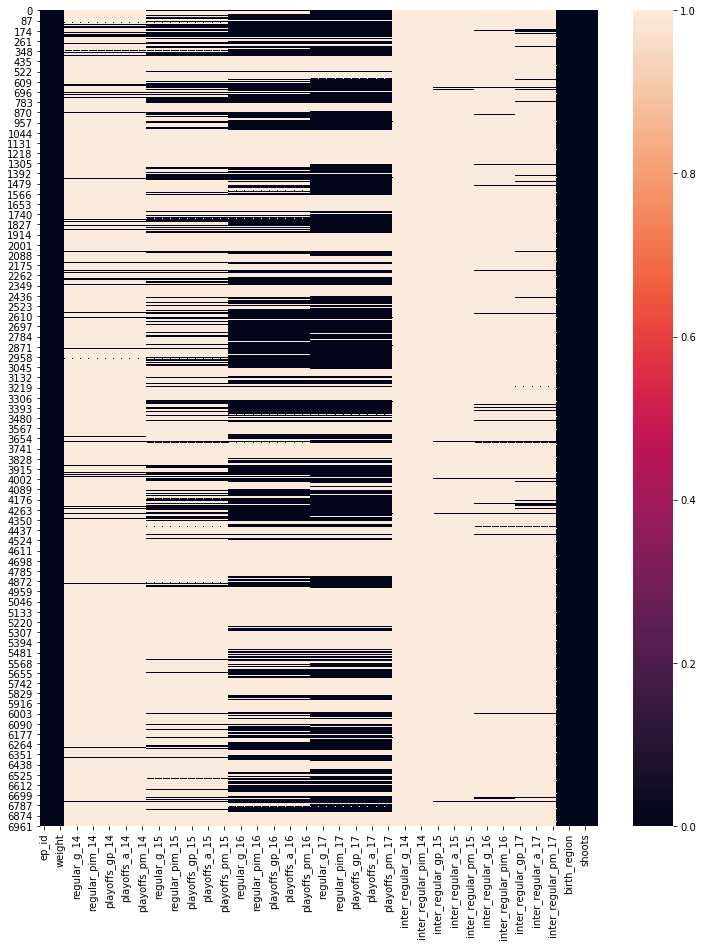

In [20]:
fig, ax = plt.subplots(1, figsize=[12.5, 15])

ax = sns.heatmap(main.isnull())

plt.show()

### Impute values

In [21]:
main.columns

Index(['ep_id', 'height', 'weight', 'regular_gp_14', 'regular_g_14',
       'regular_a_14', 'regular_pim_14', 'regular_pm_14', 'playoffs_gp_14',
       'playoffs_g_14', 'playoffs_a_14', 'playoffs_pim_14', 'playoffs_pm_14',
       'regular_gp_15', 'regular_g_15', 'regular_a_15', 'regular_pim_15',
       'regular_pm_15', 'playoffs_gp_15', 'playoffs_g_15', 'playoffs_a_15',
       'playoffs_pim_15', 'playoffs_pm_15', 'regular_gp_16', 'regular_g_16',
       'regular_a_16', 'regular_pim_16', 'regular_pm_16', 'playoffs_gp_16',
       'playoffs_g_16', 'playoffs_a_16', 'playoffs_pim_16', 'playoffs_pm_16',
       'regular_gp_17', 'regular_g_17', 'regular_a_17', 'regular_pim_17',
       'regular_pm_17', 'playoffs_gp_17', 'playoffs_g_17', 'playoffs_a_17',
       'playoffs_pim_17', 'playoffs_pm_17', 'inter_regular_gp_14',
       'inter_regular_g_14', 'inter_regular_a_14', 'inter_regular_pim_14',
       'inter_regular_pm_14', 'inter_regular_gp_15', 'inter_regular_g_15',
       'inter_regular_a_15', 

In [24]:
counts = [
    'regular_gp_14', 'regular_g_14', 'regular_a_14', 'regular_pim_14',
    'playoffs_gp_14', 'playoffs_g_14', 'playoffs_a_14', 'playoffs_pim_14',
    'inter_regular_gp_14', 'inter_regular_g_14', 'inter_regular_a_14', 'inter_regular_pim_14',
    'regular_gp_15', 'regular_g_15', 'regular_a_15', 'regular_pim_15',
    'playoffs_gp_15', 'playoffs_g_15', 'playoffs_a_15', 'playoffs_pim_15',
    'inter_regular_gp_15', 'inter_regular_g_15', 'inter_regular_a_15', 'inter_regular_pim_15',
    'regular_gp_16', 'regular_g_16', 'regular_a_16', 'regular_pim_16',
    'playoffs_gp_16', 'playoffs_g_16', 'playoffs_a_16', 'playoffs_pim_16',
    'inter_regular_gp_16', 'inter_regular_g_16', 'inter_regular_a_16', 'inter_regular_pim_16',
    'regular_gp_17', 'regular_g_17', 'regular_a_17', 'regular_pim_17',
    'playoffs_gp_17', 'playoffs_g_17', 'playoffs_a_17', 'playoffs_pim_17',
    'inter_regular_gp_17', 'inter_regular_g_17', 'inter_regular_a_17', 'inter_regular_pim_17',
]

plus_minuses = [
    'regular_pm_14', 'regular_pm_15', 'regular_pm_16', 'regular_pm_17',
    'playoffs_pm_14', 'playoffs_pm_15', 'playoffs_pm_16', 'playoffs_pm_17',
    'inter_regular_pm_14', 'inter_regular_pm_15', 'inter_regular_pm_16', 'inter_regular_pm_17'
]

In [25]:
main[counts] = main[counts].replace(np.nan, 0)
main[plus_minuses] = main[plus_minuses].replace(np.nan, 0)

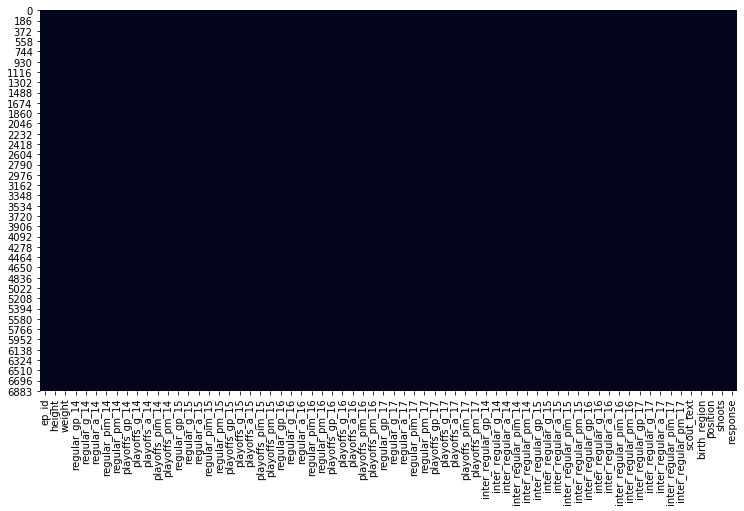

In [26]:
fig, ax = plt.subplots(1, figsize=[12.5, 7])

ax = sns.heatmap(main.isnull(), cbar=False)

plt.show()

## Scouting Reports

In [52]:
main['scout_text']

0                               -
1                               -
2                               -
3                               -
4                               -
                  ...            
7028       Brother: Wylen Bourque
7029                            -
7030                            -
7031    Father: Branislav Okuliar
7032                            -
Name: scout_text, Length: 7032, dtype: object

In [28]:
partial = pd.read_csv('scout_text_partial_label.csv').drop('Unnamed: 0', 1)
partial = partial[partial['type'] == 'Yes']
response = main[['ep_id', 'response']]
partial = pd.merge(partial, response, on='ep_id', how='left')

In [29]:
partial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 646
Data columns (total 4 columns):
ep_id         647 non-null int64
scout_text    647 non-null object
type          647 non-null object
response      595 non-null object
dtypes: int64(1), object(3)
memory usage: 25.3+ KB


In [30]:
def avg_words(sentence):
    words = sentence.split()
    return round((sum(len(word) for word in words)/len(words)), 2)

In [31]:
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
partial['scout_text'] = partial['scout_text'].str.replace('[^\w\s]','')
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

In [32]:
partial['word_count'] = partial['scout_text'].apply(lambda x: len(str(x).split(' ')))
partial['char_count'] = partial['scout_text'].str.len()
partial['avg_word'] = partial['scout_text'].apply(lambda x: avg_words(x))
partial['stop_words'] = partial['scout_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
partial['upper'] = partial['scout_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

In [33]:
freq = pd.Series(' '.join(partial['scout_text']).split()).value_counts()[:10]

In [34]:
freq = list(freq.index)
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join(x for x in x.split() if x not in freq))

In [35]:
freq = pd.Series(' '.join(partial['scout_text']).split()).value_counts()[-1636:]

In [36]:
freq = list(freq.index)
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join(x for x in x.split() if x not in freq))

In [37]:
#partial['scout_text'] = partial['scout_text'].apply(lambda x: str(TextBlob(x).correct()))

In [39]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/tom/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
TextBlob(partial['scout_text'][1]).words

WordList(['mcmillan', 'working', 'winger', 'decent', 'hands', 'hockey', 'sense', 'could', 'improve', 'skating', 'speed', 'erik', 'k', 'piri'])

In [41]:
st = PorterStemmer()
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))

In [43]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/tom/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [44]:
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))

In [45]:
partial['sentiment'] = partial['scout_text'].apply(lambda x: TextBlob(x).sentiment[0])

In [46]:
partial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 646
Data columns (total 10 columns):
ep_id         647 non-null int64
scout_text    647 non-null object
type          647 non-null object
response      595 non-null object
word_count    647 non-null int64
char_count    647 non-null int64
avg_word      647 non-null float64
stop_words    647 non-null int64
upper         647 non-null int64
sentiment     647 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 75.6+ KB


In [47]:
partial.sample(10)

,ep_id,scout_text,type,response,word_count,char_count,avg_word,stop_words,upper,sentiment
115,15588,defenseman sound playmak abil could improv def...,Yes,Lower,21,154,6.38,0,0,0.400000
200,9495,defens center worker attitud foot speed strong...,Yes,Lower,16,116,6.31,0,0,0.166667
214,95921,physic domin winger abil skill charact role en...,Yes,Not Active,53,348,5.58,0,0,0.300000
147,274875,hardwork center take shift come find way make ...,Yes,Not Active,66,459,5.97,0,0,0.256667
610,225188,strong transit twoway defend excel pressur sit...,Yes,Not Active,59,429,6.29,0,0,0.081667
557,62109,competit twoway forward skill consist creat of...,Yes,Not Active,54,398,6.39,0,0,0.219444
488,11662,big winger decent set hand own like go straigh...,Yes,Lower,21,130,5.24,0,0,0.193333
143,27126,defenseman solid allaround abil size decent so...,Yes,Lower,20,123,5.20,0,0,0.104167
258,11109,twoway forward score goal make pretti pas grea...,Yes,NHL,16,102,5.44,0,0,0.507143
63,9498,skill forward center wing fine playmak abil gr...,Yes,Lower,28,181,5.50,0,0,0.293333


In [48]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7032
Data columns (total 68 columns):
ep_id                   7032 non-null int64
height                  7032 non-null int64
weight                  7032 non-null int64
regular_gp_14           7032 non-null float64
regular_g_14            7032 non-null float64
regular_a_14            7032 non-null float64
regular_pim_14          7032 non-null float64
regular_pm_14           7032 non-null float64
playoffs_gp_14          7032 non-null float64
playoffs_g_14           7032 non-null float64
playoffs_a_14           7032 non-null float64
playoffs_pim_14         7032 non-null float64
playoffs_pm_14          7032 non-null float64
regular_gp_15           7032 non-null float64
regular_g_15            7032 non-null float64
regular_a_15            7032 non-null float64
regular_pim_15          7032 non-null float64
regular_pm_15           7032 non-null float64
playoffs_gp_15          7032 non-null float64
playoffs_g_15           7

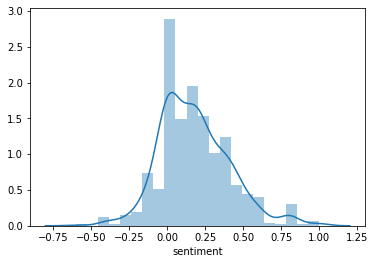

In [49]:
sns.distplot(partial['sentiment'])

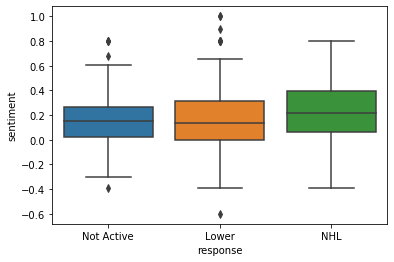

In [50]:
sns.boxplot(partial['response'], partial['sentiment'])

In [53]:
keep = [
    'ep_id', 'type', 'word_count', 'char_count', 'avg_word', 'stop_words', 'upper', 'sentiment'
]

partial = partial[keep]

In [54]:
main = pd.merge(main, partial, on='ep_id', how='left')

In [55]:
main = main[main['type'] == 'Yes']

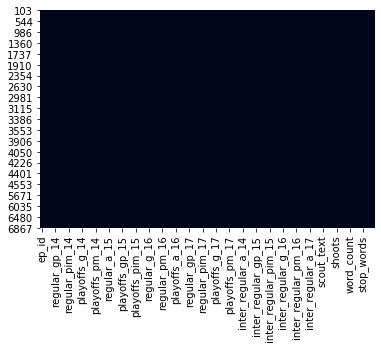

In [56]:
sns.heatmap(main.isnull(), cbar=False)

In [57]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 103 to 6952
Data columns (total 75 columns):
ep_id                   595 non-null int64
height                  595 non-null int64
weight                  595 non-null int64
regular_gp_14           595 non-null float64
regular_g_14            595 non-null float64
regular_a_14            595 non-null float64
regular_pim_14          595 non-null float64
regular_pm_14           595 non-null float64
playoffs_gp_14          595 non-null float64
playoffs_g_14           595 non-null float64
playoffs_a_14           595 non-null float64
playoffs_pim_14         595 non-null float64
playoffs_pm_14          595 non-null float64
regular_gp_15           595 non-null float64
regular_g_15            595 non-null float64
regular_a_15            595 non-null float64
regular_pim_15          595 non-null float64
regular_pm_15           595 non-null float64
playoffs_gp_15          595 non-null float64
playoffs_g_15           595 non-null float6

### Inspect and Export

In [58]:
main_test = main.drop(['ep_id', 'scout_text', 'type'], 1)

In [59]:
main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 103 to 6952
Data columns (total 72 columns):
height                  595 non-null int64
weight                  595 non-null int64
regular_gp_14           595 non-null float64
regular_g_14            595 non-null float64
regular_a_14            595 non-null float64
regular_pim_14          595 non-null float64
regular_pm_14           595 non-null float64
playoffs_gp_14          595 non-null float64
playoffs_g_14           595 non-null float64
playoffs_a_14           595 non-null float64
playoffs_pim_14         595 non-null float64
playoffs_pm_14          595 non-null float64
regular_gp_15           595 non-null float64
regular_g_15            595 non-null float64
regular_a_15            595 non-null float64
regular_pim_15          595 non-null float64
regular_pm_15           595 non-null float64
playoffs_gp_15          595 non-null float64
playoffs_g_15           595 non-null float64
playoffs_a_15           595 non-null floa

In [61]:
main_test.to_csv('main_test.csv')